<a href="https://colab.research.google.com/github/lomovtsevp/ML_course_MIREA/blob/main/ML2/PR2/pr_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Полносвязная нейронка. 
Архитектура: Линейный слой с 128 выходами -> ReLU -> Линейный слой с 64 выходами -> ReLu -> Линейный слой с 10 выходами -> Софтмакс.

# Итоги вариации параметров и архитектуры:
- При увеличении количества линейных слоев и количества нейронов модель переобучается + скор особо не растет.
- При смене ФА с ReLu на гиперболический тангенс, сигмоиду или их комбинацию скор начинает падать.
- При увеличении количества эпох модель переобучается. Пробовал добавить дропаут - не помогло. Работает хуже, если увеличить количество эпох.
<font color='Green'>
- Батч-нормализация подняла скор на 0.05.
<font color='white'>
- При изменении оптимизаторов и лосс-функции скор стал хуже.

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/train/cifar-10-python.tar.gz to ./data/train


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/test/cifar-10-python.tar.gz to ./data/test
Эпоха 1 завершилась с функцией стоимости на последнем пакете = 1.5011848211288452
Эпоха 2 завершилась с функцией стоимости на последнем пакете = 1.3365615606307983
Эпоха 3 завершилась с функцией стоимости на последнем пакете = 1.065200686454773
Эпоха 4 завершилась с функцией стоимости на последнем пакете = 1.434305191040039
Эпоха 5 завершилась с функцией стоимости на последнем пакете = 1.1622552871704102
Эпоха 6 завершилась с функцией стоимости на последнем пакете = 1.0470640659332275
Эпоха 7 завершилась с функцией стоимости на последнем пакете = 1.0574357509613037
Эпоха 8 завершилась с функцией стоимости на последнем пакете = 1.1961731910705566
Эпоха 9 завершилась с функцией стоимости на последнем пакете = 1.309121012687683
Эпоха 10 завершилась с функцией стоимости на последнем пакете = 0.8587031364440918
Эпоха 11 завершилась с функцией стоимости на последнем пакете = 1.2092869281768799
Эпоха 12 завершилась с функцией стоимо

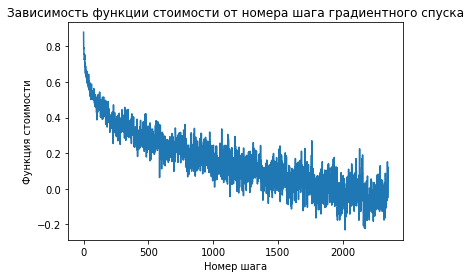

Точность (accuracy) на обучающей выборке: 0.69872
Точность (accuracy) на тестовой выборке: 0.5325


In [1]:
# Импортируем основные модули pytorch
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

# Импортируем модули, связанные с компьютерным зрением
from torchvision import datasets
from torchvision.transforms import ToTensor

# Импортируем вспомогательные модули
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# В данной лабораторной работе вам необходимо обучить две сети с архитектурой,
# которую вам необходимо разработать самостоятельно.
# В этой части предлагается реализовать полносвязную сеть без использования сверточных слоев.
# Поэкспериментируйте с использованием слоев пакетной нормализации и дропаута.
# Сравните точность на тестовой выборке с аналогичными результатами одногруппников.
class FCNet(nn.Module):

    def __init__(self):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(32 * 32 * 3, 128),
            nn.BatchNorm1d(128),
            #nn.Dropout(),
            nn.ReLU(),
            nn.Linear(128, 64),
            #nn.Dropout(),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

        # ===============

    # Метод для выполнения прямого распространения сигнала, необходимо заполнить
    def forward(self, x):
      
      return self.classifier(x)
        
        # ===============

# Задаем количество эпох (проходов по всей обучающей выборке) и размер пакета, можно варьировать
EPOCHS = 12
BATCH_SIZE = 256

# Загружаем данные из набора CIFAR10
train_data = datasets.CIFAR10(root='./data/train', train=True, download=True, transform=ToTensor())
test_data = datasets.CIFAR10(root='./data/test', train=False, download=True, transform=ToTensor())


# DataLoader позволяет разбить выборку на пакеты заданного размера.
# Параметр shuffle отвечает за перемешивание данных в пакете
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

# Если графический ускоритель поддерживает обучение на нем, будем использовать его,
# иначе обучать на процессоре.
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Готовимся к обучению
model = FCNet().to(device)  # создаем модель
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # оптимизатор, нужно выбрать и настроить
loss_function = nn.CrossEntropyLoss()  # функция потерь, нужно выбрать
loss_history = list()  # список для хранения истории изменения функции стоимости

# Начинаем обучение
for epoch in range(EPOCHS):
    for i, (batch, labels) in enumerate(train_loader):  # разбиваем выборку на пакеты
        # Нужно реализовать один шаг градиентного спуска
        batch = batch.reshape(batch.shape[0], -1)
        optimizer.zero_grad()
        loss = loss_function(model(batch), labels) # значение функции стоимости на пакете, нужно рассчитать
        loss.backward()
        optimizer.step() 
        loss_history.append(loss.log().item())  # добавляется логарифм стоимости для большей наглядности
    print(f'Эпоха {epoch + 1} завершилась с функцией стоимости на последнем пакете = {loss.item()}')


# Выводим график функции стоимости
plt.title('Зависимость функции стоимости от номера шага градиентного спуска')
plt.xlabel('Номер шага')
plt.ylabel('Функция стоимости')
plt.plot(loss_history)
plt.show()

# Отключаем расчет вычислительного графа для экономии времени и памяти: нам не нужно считать градиенты при тестировании модели
with torch.no_grad():
    # Оцениваем качество модели
    train_data_loader = DataLoader(train_data, batch_size=len(train_data))
    train_features, train_targets = next(iter(train_data_loader))

    train_features = train_features.reshape(len(train_data), -1).to(device)
    train_model_predictions = torch.argmax(model(train_features), dim=1)
    print('Точность (accuracy) на обучающей выборке:', accuracy_score(train_data.targets, train_model_predictions.cpu()))

    test_data_loader = DataLoader(test_data, batch_size=len(test_data))
    test_features, test_targets = next(iter(test_data_loader))

    test_features = test_features.reshape(len(test_data), -1).to(device)
    test_model_predictions = torch.argmax(model(test_features), dim=1)
    print('Точность (accuracy) на тестовой выборке:', accuracy_score(test_data.targets, test_model_predictions.cpu()))

#2. CNN с собственной архитектурой.

Files already downloaded and verified
Files already downloaded and verified
Эпоха 1 завершилась с функцией стоимости на последнем пакете = 1.0617787837982178
Эпоха 2 завершилась с функцией стоимости на последнем пакете = 0.7089841365814209
Эпоха 3 завершилась с функцией стоимости на последнем пакете = 0.45959949493408203
Эпоха 4 завершилась с функцией стоимости на последнем пакете = 0.3096866309642792
Эпоха 5 завершилась с функцией стоимости на последнем пакете = 0.2479063719511032
Эпоха 6 завершилась с функцией стоимости на последнем пакете = 0.15912431478500366
Эпоха 7 завершилась с функцией стоимости на последнем пакете = 0.047565359622240067
Эпоха 8 завершилась с функцией стоимости на последнем пакете = 0.10519976913928986
Эпоха 9 завершилась с функцией стоимости на последнем пакете = 0.2624067962169647
Эпоха 10 завершилась с функцией стоимости на последнем пакете = 0.1471857726573944


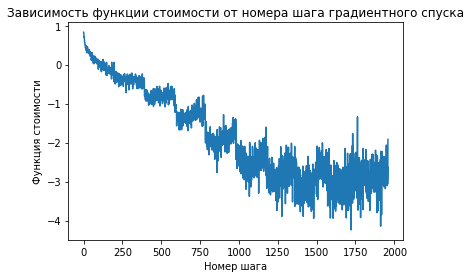

In [2]:
# Импортируем основные модули pytorch
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

# Импортируем модули, связанные с компьютерным зрением
from torchvision import datasets
from torchvision.transforms import ToTensor

# Импортируем вспомогательные модули
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# В этой части предлагается реализовать сверточную сеть.
# Поэкспериментируйте с использованием слоев пакетной нормализации и дропаута.
# Сравните точность на тестовой выборке с аналогичными результатами одногруппников.
class ConvNet(nn.Module):

    def __init__(self):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16
            nn.BatchNorm2d(64),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8
            nn.BatchNorm2d(128),

            nn.Flatten(), 
            nn.Linear(128*8*8, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10))
            
        
    def forward(self, x):
        return self.classifier(x) 


# Задаем количество эпох (проходов по всей обучающей выборке) и размер пакета, можно варьировать
EPOCHS = 10
BATCH_SIZE = 256

# Загружаем данные из набора CIFAR10
train_data = datasets.CIFAR10(root='./data/train', train=True, download=True, transform=ToTensor())
test_data = datasets.CIFAR10(root='./data/test', train=False, download=True, transform=ToTensor())

# DataLoader позволяет разбить выборку на пакеты заданного размера.
# Параметр shuffle отвечает за перемешивание данных в пакете
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

# Если графический ускоритель поддерживает обучение на нем, будем использовать его,
# иначе обучать на процессоре.
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Готовимся к обучению
model = ConvNet().to(device)  # создаем модель
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # оптимизатор, нужно выбрать и настроить
loss_function = nn.CrossEntropyLoss()  # функция потерь, нужно выбрать
loss_history = list()  # список для хранения истории изменения функции стоимости

# Начинаем обучение
for epoch in range(EPOCHS):
    for i, (batch, labels) in enumerate(train_loader):  # разбиваем выборку на пакеты
        # Нужно реализовать один шаг градиентного спуска
        #batch = batch.reshape(batch.shape[0], -1)
        optimizer.zero_grad()
        loss = loss_function(model(batch), labels) # значение функции стоимости на пакете, нужно рассчитать
        loss.backward()
        optimizer.step() 
        loss_history.append(loss.log().item())  # добавляется логарифм стоимости для большей наглядности
    print(f'Эпоха {epoch + 1} завершилась с функцией стоимости на последнем пакете = {loss.item()}')


# Выводим график функции стоимости
plt.title('Зависимость функции стоимости от номера шага градиентного спуска')
plt.xlabel('Номер шага')
plt.ylabel('Функция стоимости')
plt.plot(loss_history)
plt.show()

torch.save(model, 'CNN.pth')